In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from scipy.stats import mannwhitneyu as mannU


<h1>Quantifying the evolution of individual scientific impact</h1>

For this exercise we will reproduce the results of the paper: Quantifying the evolution
of individual scientific impact.

http://www.robertasinatra.com/pdf/Science_quantifying_aaf5239_Sinatra.pdf

The exercise consists of creating a null model for the distribution of the time of the highest impact paper in scientific careers.


<b>The dataset describing the scientist's careers is as follow:</b>

Careers time: scientist id and a list of time (in days) when his/her papers where published.

Careers cities: scientist id and a list of number of citations each paper received. Note that here we are using the number of citations as a proxy to measure the impact of a paper.

<h1>Read the time the papers were published</h1>

In [2]:
careers_time = pd.read_csv('./careers_time.txt', sep='; ', header=None, engine='python')
careers_time.columns = ['id', 'papers']

#split string into a list of ints
careers_time['papers'] = careers_time.papers.str.split('\t')
careers_time['papers'] = careers_time['papers'].apply(lambda x: [int(i) - int(x[0]) for i in x])

careers_time.head()

,id,papers
0,48,"[0, 455, 1057, 1330, 1687, 1939, 2065, 2492, 2..."
1,64,"[0, 175, 1400, 1492, 2206, 2223, 2407, 2710, 2..."
2,378,"[0, 0, 249, 354, 371, 583, 644, 675, 781, 781,..."
3,476,"[0, 61, 244, 304, 419, 594, 608, 839, 973, 109..."
4,485,"[0, 194, 335, 335, 335, 943, 973, 1218, 1980, ..."


<h1>Read the number of citations each paper received</h1>

In [3]:
careers_cites = pd.read_csv('careers_cites.txt', sep='; ', header=None, engine='python')
careers_cites.columns = ['id', 'cities']

#split string into a list of ints
careers_cites['cities'] = careers_cites.cities.str.split('\t')
careers_cites['cities'] = careers_cites['cities'].apply(lambda x: [int(i) for i in x])

careers_cites.head()

,id,cities
0,48,"[4, 6, 24, 3, 3, 2, 3, 1, 2, 21, 0, 16, 3, 1, ..."
1,64,"[1, 0, 4, 34, 1, 20, 2, 2, 9, 1, 2, 3, 6, 1, 8..."
2,378,"[2, 5, 7, 3, 1, 0, 4, 5, 5, 12, 4, 32, 12, 4, ..."
3,476,"[0, 6, 8, 8, 5, 7, 4, 2, 0, 1, 7, 0, 2, 6, 4, ..."
4,485,"[13, 6, 16, 16, 11, 6, 14, 2, 0, 6, 21, 32, 41..."


<h1>Creates the null model by randomizing the citations counts </h1>

In [4]:
#set the random seed
random.seed(0)

#creates the null model
careers_cites['randomized_cities'] = careers_cites['cities'].apply(lambda x: random.sample(x, len(x)))


In [5]:
career = pd.merge(careers_time, careers_cites)

career['highest'] = career['cities'].apply(lambda x: x.index(max(x)))
career['randomized_highest'] = career['randomized_cities'].apply(lambda x: x.index(max(x)))

career['time_highest'] = career.apply(lambda x: x['papers'][x['highest']]/365, axis=1)
career['randomized_time_highest'] = career.apply(lambda x: x['papers'][x['randomized_highest']]/365, axis=1)

In [6]:
career.head()

,id,papers,cities,randomized_cities,highest,randomized_highest,time_highest,randomized_time_highest
0,48,"[0, 455, 1057, 1330, 1687, 1939, 2065, 2492, 2...","[4, 6, 24, 3, 3, 2, 3, 1, 2, 21, 0, 16, 3, 1, ...","[3, 1, 6, 2, 1, 6, 3, 21, 1, 2, 19, 3, 7, 24, ...",2,13,2.895890,9.627397
1,64,"[0, 175, 1400, 1492, 2206, 2223, 2407, 2710, 2...","[1, 0, 4, 34, 1, 20, 2, 2, 9, 1, 2, 3, 6, 1, 8...","[34, 3, 4, 31, 0, 2, 6, 0, 12, 3, 1, 0, 2, 20,...",3,0,4.087671,0.000000
2,378,"[0, 0, 249, 354, 371, 583, 644, 675, 781, 781,...","[2, 5, 7, 3, 1, 0, 4, 5, 5, 12, 4, 32, 12, 4, ...","[5, 17, 11, 1, 0, 4, 32, 4, 6, 0, 4, 5, 11, 46...",69,13,27.819178,3.600000
3,476,"[0, 61, 244, 304, 419, 594, 608, 839, 973, 109...","[0, 6, 8, 8, 5, 7, 4, 2, 0, 1, 7, 0, 2, 6, 4, ...","[4, 4, 87, 15, 83, 75, 2, 2, 16, 7, 7, 8, 1, 8...",47,2,22.473973,0.668493
4,485,"[0, 194, 335, 335, 335, 943, 973, 1218, 1980, ...","[13, 6, 16, 16, 11, 6, 14, 2, 0, 6, 21, 32, 41...","[27, 13, 39, 6, 40, 16, 13, 7, 0, 16, 7, 2, 21...",25,40,16.967123,26.019178


<h1>Plot both distributions: Data and Randomized</h1>

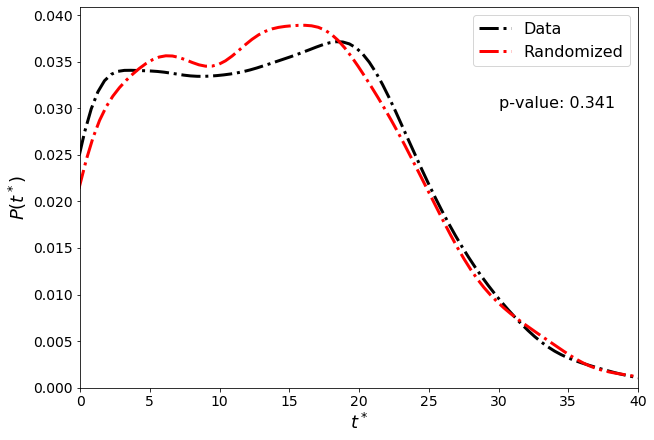

In [7]:
plt.figure(figsize=(10,7))

#Plot the distribution of the actual data
sns.distplot(career.time_highest, hist=False, kde=True, 
             bins=40, color = 'black',
             kde_kws={'linestyle': '-.', 'linewidth':3}, label='Data')

#Plot the distribution of the randomized data
sns.distplot(career.randomized_time_highest, hist=False, kde=True, 
             bins=40, color = 'red',
             kde_kws={'linestyle': '-.', 'linewidth':3}, label='Randomized')

#Mann-Whitney U test between the two distributions
p = mannU(career.time_highest, career.randomized_time_highest).pvalue


plt.xlabel('$t^*$', fontsize = 18)
plt.ylabel('$P(t^*)$', fontsize = 18)
plt.xlim(0,40)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.text(30, 0.03, "p-value: {0:.3g}".format(p), fontsize=16)
plt.show()

